<a href="https://colab.research.google.com/github/mk17250/CE888-lab-7-/blob/main/CE888_Lab_7_new_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [ ]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 36s 5ms/step - loss: 0.4690 - accuracy: 0.8499 - val_loss: 0.0606 - val_accuracy: 0.9813
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0579 - accuracy: 0.9822 - val_loss: 0.0549 - val_accuracy: 0.9846
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.0449 - val_accuracy: 0.9879
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0249 - accuracy: 0.9914 - val_loss: 0.0380 - val_accuracy: 0.9889
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0406 - val_accuracy: 0.9895


#### evaluate model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9904


0.9904000163078308

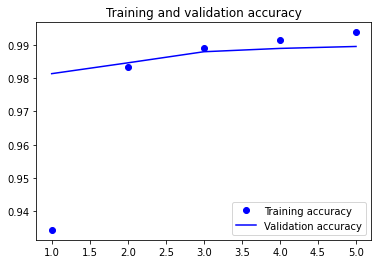

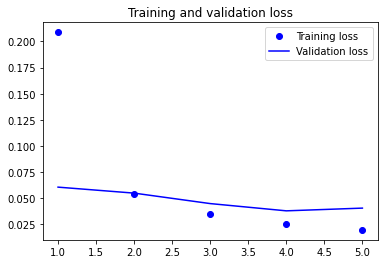

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [ ]:
# Write code here

#small convet model with added classifier 

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())  ## adding layes here from example above 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 0.4368 - accuracy: 0.8642 - val_loss: 0.0682 - val_accuracy: 0.9780
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0560 - accuracy: 0.9819 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0325 - accuracy: 0.9898 - val_loss: 0.0487 - val_accuracy: 0.9866
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0252 - accuracy: 0.9922 - val_loss: 0.0416 - val_accuracy: 0.9887
Epoch 5/5
750/750 [==============================] - 3s 5ms/step - loss: 0.0172 - accuracy: 0.9948 - val_loss: 0.0480 - val_accuracy: 0.9883


In [ ]:
## here is the model provided again with a cahnge in the activation function from 'relu' to 'sigmoid'


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.Flatten())  ## adding layes here from example above 
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
### The architectures performace decreases with the 'sigmoid' activation function!!!!!!

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 1.7004 - accuracy: 0.3973 - val_loss: 0.2762 - val_accuracy: 0.9236
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.2503 - accuracy: 0.9281 - val_loss: 0.1515 - val_accuracy: 0.9543
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.1276 - accuracy: 0.9608 - val_loss: 0.0905 - val_accuracy: 0.9732
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0900 - accuracy: 0.9725 - val_loss: 0.0739 - val_accuracy: 0.9770
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0699 - accuracy: 0.9784 - val_loss: 0.0648 - val_accuracy: 0.9812


In [ ]:
## Change model bcak to 'relu' and experiment the the amount of epochs'

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())  ## adding layes here from example above 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
#model.summary()

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

### A slight improvment in the accuracy 

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.4433 - accuracy: 0.8550 - val_loss: 0.0632 - val_accuracy: 0.9813
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0528 - accuracy: 0.9825 - val_loss: 0.0422 - val_accuracy: 0.9881
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0383 - val_accuracy: 0.9889
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0533 - val_accuracy: 0.9855
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0394 - val_accuracy: 0.9904
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.0451 - val_accuracy: 0.9896
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.0475 - val_accuracy: 0.9893
Epoch 

In [ ]:
### Now lets change the batchsize from 64 - 128


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())  ## adding layes here from example above 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
#model.summary()

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

### Another slight increase in accuracy 

Epoch 1/10
375/375 [==============================] - 3s 6ms/step - loss: 0.5922 - accuracy: 0.8098 - val_loss: 0.0680 - val_accuracy: 0.9789
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0696 - accuracy: 0.9792 - val_loss: 0.0558 - val_accuracy: 0.9837
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.0404 - val_accuracy: 0.9883
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0357 - val_accuracy: 0.9898
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.0377 - val_accuracy: 0.9902
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0369 - val_accuracy: 0.9892
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.0382 - val_accuracy: 0.9907
Epoch 

In [ ]:
## Having manually experimented with the activation functions I will now construct a grid saerch to optimise the hyperparameters 

## First step of building the grid search for optimising hyper parameters 

from tensorflow import keras 
from tensorflow.keras import layers 
from keras.models import Sequential 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy

### create function for model 

def create_model(optimizer, activation):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.Flatten())  ## adding layes here from example above 
  model.add(layers.Dense(64, activation=activation))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model 

model = KerasClassifier(build_fn=create_model)

## the constructor for the Keras.Classifier class can take default argumnets that are passed on to the calls to model.fit(), such as the numbers of epochs and the batch size

In [ ]:
## Grid search is a model hyperparameter optimisation technique  

## In scikit-learn this technique is provided in the GridSearchCV class.

# When constructing this class you must provide a dictionary of hyperparameters to evaluate in the param_grid argument. This is a map of the model parameter name and an array of values to try.
# By default, accuracy is the score that is optimized, but other scores can be specified in the score argument of the GridSearchCV constructor.
# By default, the grid search will only use one thread. By setting the n_jobs argument in the GridSearchCV constructor to -1, the process will use all cores on your machine. Depending on your Keras backend, 
# this may interfere with the main neural network training process

## grid search for optimiser and activation function 
## define optimiser 

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
activation_function = ['relu', 'sigmoid', 'softmax', 'softplus', 'softsign', 'tanh', 'elu', 'exponential']
X = train_images
Y = train_labels

param_grid = dict(optimizer=optimizer, activation=activation_function)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)




/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
